In [32]:
# purchase_algorithm.py
# ライブラリインポート
from urllib import request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import japanize_matplotlib

def get_stockvalue(url):
    # htmlを取得
    response = request.urlopen(url)
    content = response.read()
    response.close()
    html = content.decode()
    #print(html)
    
    # 以下の要素を取りに行く
    # <td class="br0"><span class="value-01">15,360</span> 円 （10/1）</td>
    soup = BeautifulSoup(html)
    table_elements = soup.find_all('td', class_='br0')
    
    # 数値のみに変換
    stock_value = table_elements[0].get_text()
    p = re.compile(r'\d+,\d+')
    stock_value = p.match(stock_value).group()
    stock_value = int(stock_value.replace(',',''))
    return stock_value

def calculate_algorithm():
    # urlを定義
    url_dic = {
        'developed':'https://www.rakuten-sec.co.jp/web/fund/detail/?ID=JP90C0009VE0',
        'japan':'https://www.rakuten-sec.co.jp/web/fund/detail/?ID=JP90C000ENA9',
        'developing':'https://www.rakuten-sec.co.jp/web/fund/detail/?ID=JP90C000F7H5',
        'all country':'https://www.rakuten-sec.co.jp/web/fund/detail/?ID=JP90C000H1T1',
    }
    # Target Portfolio
    portfolio_dic = {
        'developed':0.31875,
        'japan':0.16875,
        'developing':0.0125,
        'all country':0.5,
    }
    
    # 株の基準額
    stock_base_dic = {
        'developed':24159,
        'japan':14917,
        'developing':12748,
        'all country':15698
    }

    # 名前リスト
    name_list =["先進国", "日本", "新興国", "全世界"]
    # 毎週の基準投資額
    invest_per_week = 137416.6
    
    # 実行
    stock_dic = {}
    for i in url_dic:
        stock_value = get_stockvalue(url_dic[i])
        stock_dic[i] = stock_value
        print('{}の基準価額は{}でした...'.format(i, stock_dic[i]))
        
    # 購入額を計算    
    invest_algorithm_dic = {}
    invest_base_dic = {}
    for i in stock_dic:
        # 補正係数を計算
        correction = 2**((1-stock_dic[i]/stock_base_dic[i])*10) 
        # 補正係数をかける
        invest_algorithm_dic[i] = invest_per_week * portfolio_dic[i] * correction
        # 基準投資額も計算
        invest_base_dic[i] =  invest_per_week * portfolio_dic[i]

    # 結果を格納
    print("基準価額:", stock_dic)
    print("基準投資額:", invest_base_dic)
    print("計算購入額:", invest_algorithm_dic)
    return stock_dic, invest_base_dic, invest_algorithm_dic

In [33]:
calculate_algorithm()

developedの基準価額は24426でした...
japanの基準価額は14221でした...
developingの基準価額は13050でした...
all countryの基準価額は15839でした...
基準価額: {'developed': 24426, 'japan': 14221, 'developing': 13050, 'all country': 15839}
基準投資額: {'developed': 43801.54125, 'japan': 23189.051250000004, 'developing': 1717.7075000000002, 'all country': 68708.3}
計算購入額: {'developed': 40571.42050026423, 'japan': 32043.362529342754, 'developing': 1457.5895105716588, 'all country': 64561.04938707411}


({'developed': 24426,
  'japan': 14221,
  'developing': 13050,
  'all country': 15839},
 {'developed': 43801.54125,
  'japan': 23189.051250000004,
  'developing': 1717.7075000000002,
  'all country': 68708.3},
 {'developed': 40571.42050026423,
  'japan': 32043.362529342754,
  'developing': 1457.5895105716588,
  'all country': 64561.04938707411})

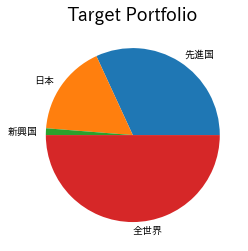

In [18]:
plt.title('Target Portfolio',fontsize=18)
plt.pie(invest_base_dic.values(), labels=name_list)
plt.show()

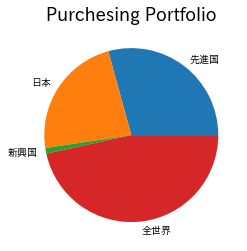

In [20]:
plt.title('Purchesing Portfolio',fontsize=18)
plt.pie(invest_algorithm_dic.values(), labels=name_list)
plt.show()